<a href="https://colab.research.google.com/github/ysy202202256/python/blob/main/%EC%8B%AC%EC%9E%A5%EB%B3%91_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()


7/7 [==============================] - 1s 36ms/step - loss: 0.6334 - accuracy: 0.6728 - val_loss: 0.6555 - val_accuracy: 0.6545
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 0.5928 - accuracy: 0.7465 - val_loss: 0.6326 - val_accuracy: 0.6364
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.5528 - accuracy: 0.7972 - val_loss: 0.6127 - val_accuracy: 0.6909
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.5273 - accuracy: 0.7650 - val_loss: 0.5919 - val_accuracy: 0.6909
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.4811 - accuracy: 0.7926 - val_loss: 0.5768 - val_accuracy: 0.6909
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.4495 - accuracy: 0.8157 - val_loss: 0.5610 - val_accuracy: 0.6909
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.4341 - accuracy: 0.8203 - val_loss: 0.5396 - val_accuracy: 0.6909
Epoch 8/100
7/7 [===================

<function matplotlib.pyplot.show(*args, **kw)>

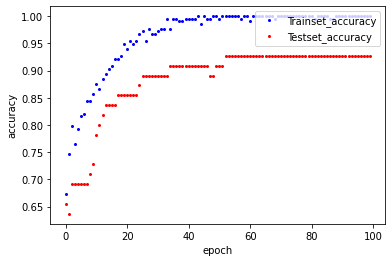

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/ysy202202256/python/main/heart%20disease%20classification%20dataset.csv")
df = df.fillna(df.mean())

df.iloc[:, 2] = pd.get_dummies(df.iloc[:, 2])
df.iloc[:, 14] = pd.get_dummies(df.iloc[:, 14])

standardization_df=(df-df.mean())/df.std()

X = standardization_df.iloc[:, 0:14]
y = df.iloc[:, 14]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = 3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.2, shuffle = True, random_state = 3)

model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)
modelpath='./data/model/Ch15-house.hdf5'
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping_callback, checkpointer])

loss = model.evaluate(X_train, y_train)
print("loss : ", loss)

y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_acc, "o", c='blue', markersize=2, label="Trainset_accuracy")
plt.plot(x_len, y_vacc, "o", c='red', markersize=2, label="Testset_accuracy")

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = 3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.2, shuffle = True, random_state = 3)

rand_clf = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state = 3)
rand_clf.fit(X_train, y_train)

y_pred_train = rand_clf.predict(X_train)
y_pred_val = rand_clf.predict(X_val)

val_score = accuracy_score(y_val, y_pred_val)
print(val_score)

y_pred_test = rand_clf.predict(X_test)
test_score = accuracy_score(y_test, y_pred_test)
print(test_score)

1.0
0.7916666666666666


In [ ]:
kf = KFold(n_splits=6, shuffle=True)

acc_score=[]
def model_fn():
  model=Sequential()
  model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(50, activation='tanh'))
  model.add(Dense(1, activation='sigmoid'))
  return model

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = model_fn()
  model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  history = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)

  accuracy = model.evaluate(X_test, y_test)
  acc_score.append(accuracy)

acc__score = []
for i in range(len(acc_score)):
  acc__score.append(acc_score[i][1])

n = sum(acc__score)/6
print("\n정확도 평균 :", n)

2/2 [==============================] - 0s 9ms/step - loss: 0.0553 - accuracy: 0.9800

정확도 평균 : 0.9703921576340994
